In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

import pandas as pd
import numpy as np

types = {'date':'object','event_id':'int64','ref_type':'category','ref_hash':'int64','application_id':'int64',\
         'attributed':'bool','device_countrycode':'category','device_os_version':'float64','device_brand':'float64',\
         'device_model':'float64','device_city':'float64','session_user_agent':'float64','trans_id':'category',\
         'user_agent':'float64','event_uuid':'object','carrier':'float64','kind':'float64','device_os':'category',\
         'wifi':'bool','connection_type':'category','ip_address':'int64','device_language':'float64'}
cols = ['date','event_id','ref_type','ref_hash','application_id',\
         'attributed','device_countrycode','device_os_version','device_brand',\
         'device_model','device_city','session_user_agent','trans_id',\
         'user_agent','event_uuid','carrier','kind',\
         'wifi','connection_type','ip_address','device_language']
events = pd.read_csv(r'Data/events.csv.gzip',compression = 'gzip', dtype = types, usecols = cols)

/home/mati/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
cols = ['advertiser_id','source_id','created','latitude','longitude','carrier_id',
        'trans_id','os_minor','agent_device','os_major','specs_brand','brand','timeToClick','touchX',
        'touchY','ref_type','ref_hash']

dtypes = {'advertiser_id':'category','source_id':'category','latitude':'float32','longitude':'float32','carrier_id':'float32',
          'brand':'category','timeToClick':'float32'}

clicks = pd.read_csv(r'Data/clicks.csv.gzip',usecols = cols,dtype = dtypes,compression = 'gzip')

In [3]:
def get_most_active(df,columnName,criteria,percentage):
    return df.nlargest(math.ceil(events[columnName].nunique()*percentage),criteria)

def get_least_active(df,columnName,criteria,percentage):
    return df.nsmallest(math.floor(events[columnName].nunique()*percentage),criteria)

def get_events_from_list(dlist,field):
    return events[events[field].isin(dlist)]

def new_comparison(dfs_to_compare,criteria,index_names):
    df = pd.DataFrame()
    j = 0
    for i in index_names:
        df[i] = dfs_to_compare[j][criteria]
        j = j +1
    return df

In [19]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  datetime64[ns]
event_id              int64
ref_type              category
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    category
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              category
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
wifi                  object
connection_type       category
ip_address            int64
device_language       float64
event_value           int64
dtypes: bool(1), category(4), datetime64[ns](1), float64(9), int64(5), object(2)
memory usage: 335.4+ MB


In [56]:
events['event_value'] = 1

In [6]:
byApp = events.groupby('application_id').agg({'event_value':'sum'})

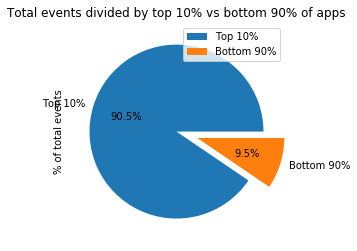

In [7]:
topApps = get_most_active(byApp,'application_id','event_value',.1)
botApps = get_least_active(byApp,'application_id','event_value',.9)
explode = [0,.25]
total = pd.DataFrame({'% of total events':[topApps['event_value'].sum(),botApps['event_value'].sum()]},
                    index = ['Top 10%','Bottom 90%'])
total.plot.pie(y = '% of total events',autopct='%1.1f%%',title = 'Total events divided by top 10% vs bottom 90% of apps',explode = explode)

In [8]:
events['date'] = pd.to_datetime(events['date'])

In [58]:
eventswifi = events.groupby(['ref_hash','wifi']).agg({'event_value':'sum'})
events.wifi.reset_index()
eventswifi.head()

event_value
ref_hash        wifi              
163367509015039 True             1
533598976671757 True             1
536121741587392 True             2
542666285694718 False            4
                True             3

In [36]:
eventsref.index

Int64Index([    163367509015039,     264819082914115,     400199180093841,
                473597089501983,     533598976671757,     536121741587392,
                542666285694718,     557498597278769,     600055813374062,
                612201781063017,
            ...
            9223008425170922022, 9223012612488100531, 9223067760045772077,
            9223080948870532020, 9223085717969577334, 9223177286048989154,
            9223181552426975748, 9223208317795541061, 9223281253059206089,
            9223315715583246351],
           dtype='int64', name='ref_hash', length=196049)

In [66]:
eventswifi = events.groupby('wifi').agg({'event_value':'sum'})
eventswifi.unstack()
eventswifi.head()

Index([False, True], dtype='object', name='wifi')

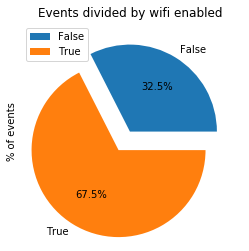

In [70]:
explode = [0,.25]
eventswifi['% of events'] = eventswifi['event_value']
eventswifi.plot.pie(y = '% of events',autopct='%1.1f%%',title = 'Events divided by wifi enabled',explode = explode)